<center><h4>Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python</h4></center>
<center><h4>Universidad Privada Boliviana</h4></center>

<center><h3>MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATÉGICAS</h3></center>
<center>Enrique Alejandro Laurel Cossio, Septiembre 2024</center>

<center><h1>Trabajo Final</h1></center>

In [1]:
# Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,confusion_matrix,recall_score,classification_report,precision_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS/main/data/ifood_df.csv'
ifood_df = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(ifood_df.shape)
ifood_df.head(3)

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0


In [5]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

## Filtrando la base de datos para incluir solo grupo Target (personas con hijos)

In [7]:
# Define la condición de filtrado
condition = (ifood_df['Kidhome'] == 1) & (ifood_df['Teenhome'] == 1)


In [9]:
# Filtra el DataFrame y excluye las columnas no deseadas
filtered_df = ifood_df[condition].drop(columns=['Kidhome', 'Teenhome'])

print(filtered_df.head())  # Display the first few rows

     Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1   46344.0       38        11          1                6                2   
9    5648.0       68        28          0                6                1   
12  59354.0       53       233          2               53                3   
15  41850.0       51        53          5               19                2   
25  53359.0        4       173          4               30                3   

    MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
1                  1             6                  2                1  ...   
9                  1            13                  1                1  ...   
12                 5            14                  3                6  ...   
15                13             4                  3                3  ...   
25                 6            41                  4                5  ...   

    marital_Together  marital_Widow  education_2n 

In [42]:
filtered_df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Solo columnas con variables cualitativas

In [11]:
# Seleccionar las columnas de interés
columnas = [ 'marital_Divorced','marital_Married', 'marital_Single', 'marital_Together', 'MntTotal', 'AcceptedCmpOverall']
variables_cualitativas = filtered_df[columnas]
variable_y = filtered_df['Response']


In [13]:
# una copia a los datos
#df = ifood_df.copy()

# seleccionamos variables explicativas y variables dependiente
X = variables_cualitativas
y = variable_y

### Dividiendo los datos para entrenar los modelos

In [15]:
print(X.shape, y.shape)
X.head(2)

(368, 6) (368,)


,marital_Divorced,marital_Married,marital_Single,marital_Together,MntTotal,AcceptedCmpOverall
1,0,0,1,0,21,0
9,0,0,0,1,36,1


In [33]:
# Dividir los datos filtrados en conjuntos de entrenamiento y prueba
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X, y, test_size=0.3, random_state=42)

# Árbol de decisión 

### Hiperparámetros

In [35]:
# hallamos los mejors hiperparametros del modelo
# Crear el clasificador
clf = DecisionTreeClassifier()

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda en la grilla
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_filtered, y_train_filtered)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

## Entrenando los modelos

In [37]:
# Entrenamos el Modelo de Árbol de Decisión para Clasificación

# Crea un clasificador de árbol de decisión
modelo_ArbolDecisionClasif = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=10)
#10 2 2
# Entrena el modelo en los datos de entrenamiento
arbol=modelo_ArbolDecisionClasif.fit(X_train_filtered, y_train_filtered)

## Obtenemos la importancia de las variables

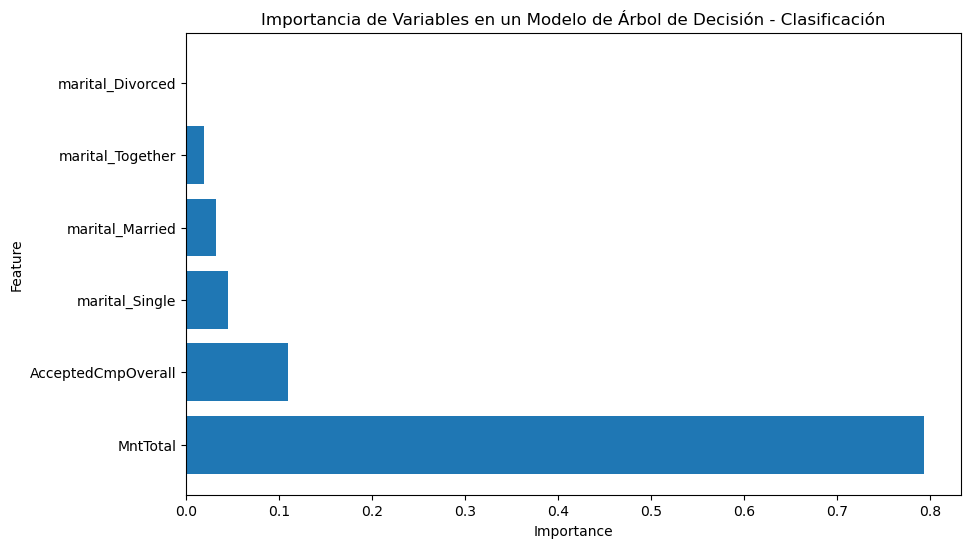

In [39]:
# Obtenemos la importancia de las variables
#feature_importance = modelo_ArbolDecisionClasif.feature_importances_
feature_importance = arbol.feature_importances_

# Creamos un DataFrame para visualizar las importancias junto con los nombres de las variables
feature_names = X_train_filtered.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenamos por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de Variables en un Modelo de Árbol de Decisión - Clasificación')
plt.show()

Aqui vemos que la variable mas importante de 'AcceptedCmpOverall'
Y que la mitad o poco menos de las variables, segun la grafica, son menos importantes.

## Realizando predicciones con el conjunto de prueba

In [41]:
# Arbol de Decisión - Clasificación 

print('Predicción Árbol de Decisión - Clasificación')
y_pred_ArbolDecisionClasif = arbol.predict_proba(X_test_filtered)
y_pred_ArbolDecisionClasif = pd.DataFrame(y_pred_ArbolDecisionClasif)
y_pred_ArbolDecisionClasif = y_pred_ArbolDecisionClasif.iloc[:,1]
print(y_pred_ArbolDecisionClasif.head(3))

Predicción Árbol de Decisión - Clasificación
0    0.00
1    0.00
2    0.25
Name: 1, dtype: float64


## Obteniendo el mejor alpha para nuestro árbol

In [43]:
# Calcular la curva ROC - Arbol de Decisión
#obteniendo el mejor alpha para un arbol de decisión
fpr, tpr, thresholds = roc_curve(y_test_filtered, y_pred_ArbolDecisionClasif)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Umbral óptimo- Arbol de Decisión:", optimal_threshold)

Umbral óptimo- Arbol de Decisión: 0.2222222222222222


> El mejor alpha para el árbol de decisión 0.5

## Matriz de confusión

In [47]:
# Árbol de Decisión - Clasificación
confusion = confusion_matrix(y_test_filtered, (y_pred_ArbolDecisionClasif>=0.22222).astype(int))
print("\nMatriz de confusión - Árbol de Decisión:")
print(confusion)


Matriz de confusión - Árbol de Decisión:
[[87 14]
 [ 6  4]]


## Visualizando el árbol

In [49]:
from sklearn import tree

|--- MntTotal <= 89.50
|   |--- marital_Single <= 0.50
|   |   |--- MntTotal <= 24.50
|   |   |   |--- MntTotal <= 23.50
|   |   |   |   |--- class: 0
|   |   |   |--- MntTotal >  23.50
|   |   |   |   |--- class: 0
|   |   |--- MntTotal >  24.50
|   |   |   |--- class: 0
|   |--- marital_Single >  0.50
|   |   |--- AcceptedCmpOverall <= 0.50
|   |   |   |--- MntTotal <= 52.00
|   |   |   |   |--- class: 0
|   |   |   |--- MntTotal >  52.00
|   |   |   |   |--- MntTotal <= 60.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MntTotal >  60.50
|   |   |   |   |   |--- MntTotal <= 68.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MntTotal >  68.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- AcceptedCmpOverall >  0.50
|   |   |   |--- class: 1
|--- MntTotal >  89.50
|   |--- MntTotal <= 121.50
|   |   |--- MntTotal <= 119.50
|   |   |   |--- AcceptedCmpOverall <= 0.50
|   |   |   |   |--- marital_Married <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |

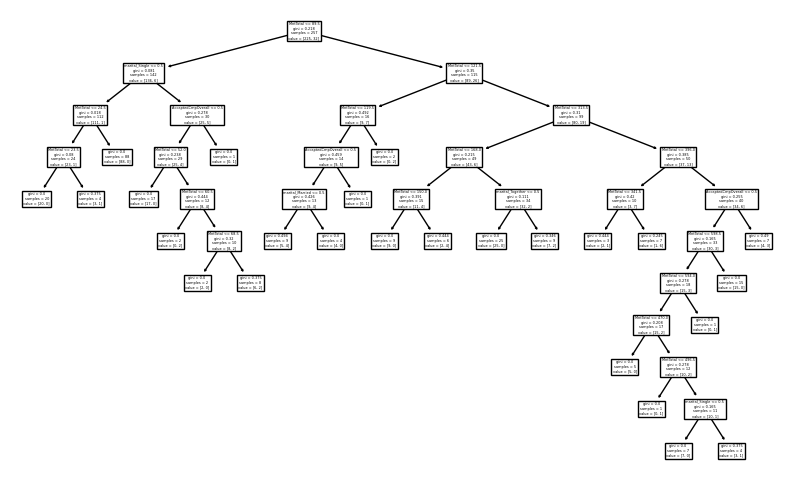

In [51]:
print(tree.export_text(arbol,
                       feature_names=['marital_Divorced','marital_Married', 'marital_Single', 'marital_Together', 'MntTotal', 'AcceptedCmpOverall']))
                       
plt.figure(figsize=(10,6))
tree.plot_tree(arbol, feature_names=['marital_Divorced','marital_Married', 'marital_Single', 'marital_Together', 'MntTotal', 'AcceptedCmpOverall'])
plt.show()

## Accuracy 

In [53]:
# Árbol de Decisión - Clasificación
exactitud_test_ArbolDecisionClasif = accuracy_score(y_test_filtered, (y_pred_ArbolDecisionClasif>=0.22222).astype(int))
print("Precisión del modelo-Arbol de Decisión:", exactitud_test_ArbolDecisionClasif)

Precisión del modelo-Arbol de Decisión: 0.8198198198198198


> **Aqui vemos que el modelo de árbol de decisión desarrollado para predecir la intención de compra de nuestros productos para niños alcanzó una exactitud del 86.48% en el conjunto de prueba. Este resultado indica que el modelo tiene una capacidad razonable para identificar a los clientes con mayor probabilidad de realizar una compra.** 

## Recall

In [55]:
# Árbol de Decisión - Clasificación
sensibilidad_test_ArbolDecisionClasif = recall_score(y_test_filtered, (y_pred_ArbolDecisionClasif>=0.22222).astype(int))
print("Sensibilidad del modelo-Arbol de Decisión:", sensibilidad_test_ArbolDecisionClasif)

Sensibilidad del modelo-Arbol de Decisión: 0.4


>  **El árbol identifica correctamente al 40% de los clientes que realmente van a comprar como compradores. En otras palabras, de cada 100 clientes que realmente compran, tu modelo identifica correctamente a 40% de ellos.**

# Regresión logistica 

In [58]:
# Ajusta el modelo de regresión logística
modelo_logit = sm.Logit(y_train_filtered, X_train_filtered).fit()


Optimization terminated successfully.
         Current function value: 0.358000
         Iterations 7


In [60]:
# ajustamos el indice en x_test
X_test_filtered.reset_index(drop=True, inplace=True)


In [62]:
# Regresión Logistica - Logit

print('Predicción Regresión Logística - Logit')
y_pred_logit = modelo_logit.predict(X_test_filtered)
print(y_pred_logit.head(3))

Predicción Regresión Logística - Logit
0    0.406930
1    0.104244
2    0.198260
dtype: float64


## Obteniendo el mejor alpha para modelo logistico

In [64]:
# Calcular la curva ROC - LOGIT

fpr, tpr, thresholds = roc_curve(y_test_filtered, y_pred_logit)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Umbral óptimo Logit:", optimal_threshold)

Umbral óptimo Logit: 0.12519733186518447


## Matriz de confusión 

In [68]:
# Matriz de confusión

            #Predicción
            #   0   1
#ValorReal  0 # VN FP
#Valor Real 1 # FN VP

# Regresión Logistica - Logit
confusion = confusion_matrix(y_test_filtered, (y_pred_logit>=0.12519733186518447).astype(int))
print("Matriz de confusión - Logit:")
print(confusion)

Matriz de confusión - Logit:
[[65 36]
 [ 4  6]]


## Accuracy

In [70]:
# Regresión Logistica - Logit
exactitud_test_logit = accuracy_score(y_test_filtered, (y_pred_logit>=0.12519733186518447).astype(int))
print("Precisión del modelo-Logit:", exactitud_test_logit)

Precisión del modelo-Logit: 0.6396396396396397


> **Aqui vemos que el modelo de regresión logística desarrollado para predecir la intención de compra de nuestros productos para niños alcanzó una exactitud del 63.51% en el conjunto de prueba. Este resultado indica que el modelo tiene una buena capacidad para identificar a los clientes con mayor probabilidad de realizar una compra.**

## Recall

In [72]:
# Regresion Logistica - Logit
sensibilidad_test_logit = recall_score(y_test_filtered, (y_pred_logit>=0.12519733186518447).astype(int))
print("Sensibilidad del modelo-Logit:", sensibilidad_test_logit)

Sensibilidad del modelo-Logit: 0.6


>  **El modelos de regresión logísitica identifica correctamente al 60% de los clientes que realmente van a comprar como compradores. Este modelo ha mostrado una mejora sustancial en la identificación de clientes potenciales, a diferencia del árbol de desición.**

> **Por lo que nuestro modelo de regresión es mejor al identificar los clientes objetivo y maximizar las ventas según estos resultados**